Language of logic parser is somewhat simpler than language of arithmetic.

```xml
<expr> ::= { <term> "imp" } <term> | <term> { ( "iff" | "xor") <term> }
<term> ::= <factor> { ("and" | "or") <factor> }
<factor> ::= '(' <expr> ')' | { "not" } <atom>
<atom> ::= [A-Z] { [A-Za-z0-9_] } | "bot"
```

In [1]:
from logic_parse import *

def testParser(input_text, showOption='polish', showOperType=False):
  # showOption ::= 'polish' | 'RPN' | 'infix_latex' | 'tree'
  # showOperType has effect only when showOption == 'polish' or 'RPN'
  from IPython.display import display, Math

  try:
    ast = parse_text(input_text)
  except ValueError as e:
    print(f"ValueError: {e}")
  except SyntaxError as e:
    print(f"SyntaxError: {e}")
  else:
    if showOption=='polish':
      print(ast.build_polish_notation(showOperType))
    elif showOption=='RPN':
      print(ast.build_RPN(showOperType))
    elif showOption=='infix_latex':
      s = ast.build_infix_latex()
      # print(s) # latex source text
      display(Math(f"${s}$"))
    elif showOption=='tree':
      ast.draw_tree()
    else:
      raise ValueError(f"Invalid showOption: {showOption}")

<IPython.core.display.Math object>

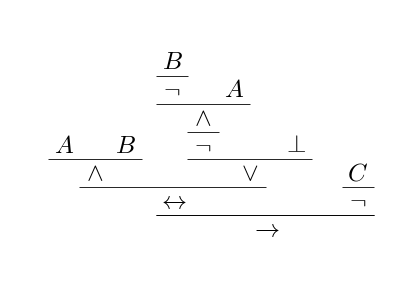

In [2]:
input_formula = "A and B iff not (not (B) and A) or bot imp (not C)"
testParser(input_formula, 'infix_latex')
testParser(input_formula, 'tree')